# 特徴点のマッチング

* 出典: http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_feature2d/py_matcher/py_matcher.html
(総当り法BFMatcher)

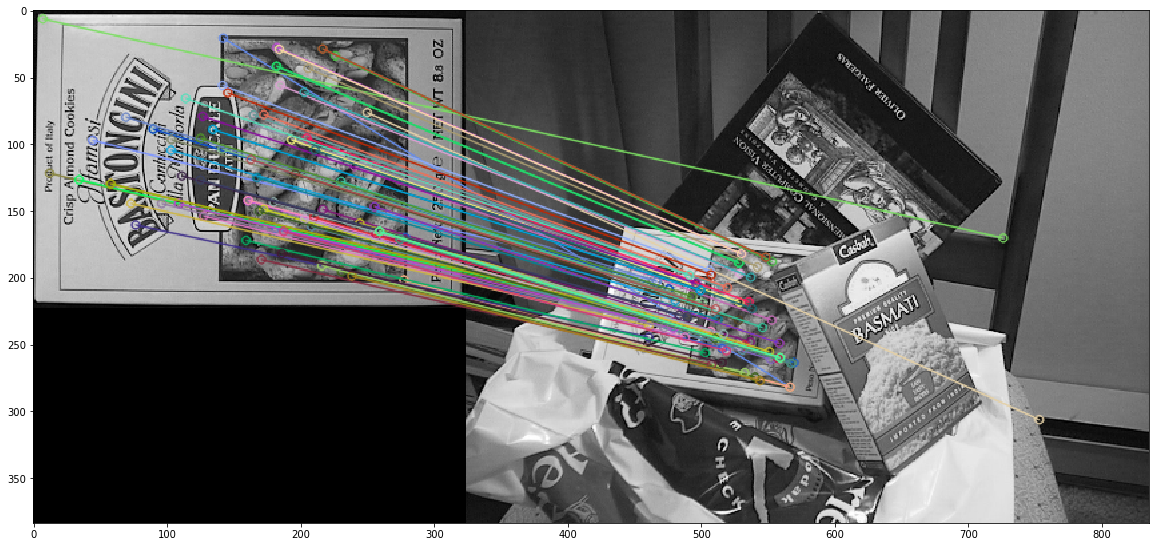

(<matplotlib.image.AxesImage at 0x7fe1034867b8>, None)

In [16]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Figs/box.png',0)          # queryImage
img2 = cv2.imread('Figs/box_in_scene.png',0) # trainImage

# SIFT検出器を始める
sift = cv2.xfeatures2d.SIFT_create()

# SIFTでキーポイントと特徴記述子を求める
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# デフォルトのパラメタを使ったBFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# 割合試験を適用
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn はmatchesとしてリストを期待
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)

plt.figure(figsize=(20,14))
plt.imshow(img3),plt.show()


* 出典: http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html
特徴点のマッチングとcalib3dモジュールのfindHomographyを組み合わせて，複雑な画像中から既知の物体を検出する
* 出典: https://qiita.com/hitomatagi/items/caac014b7ab246faf6b1 

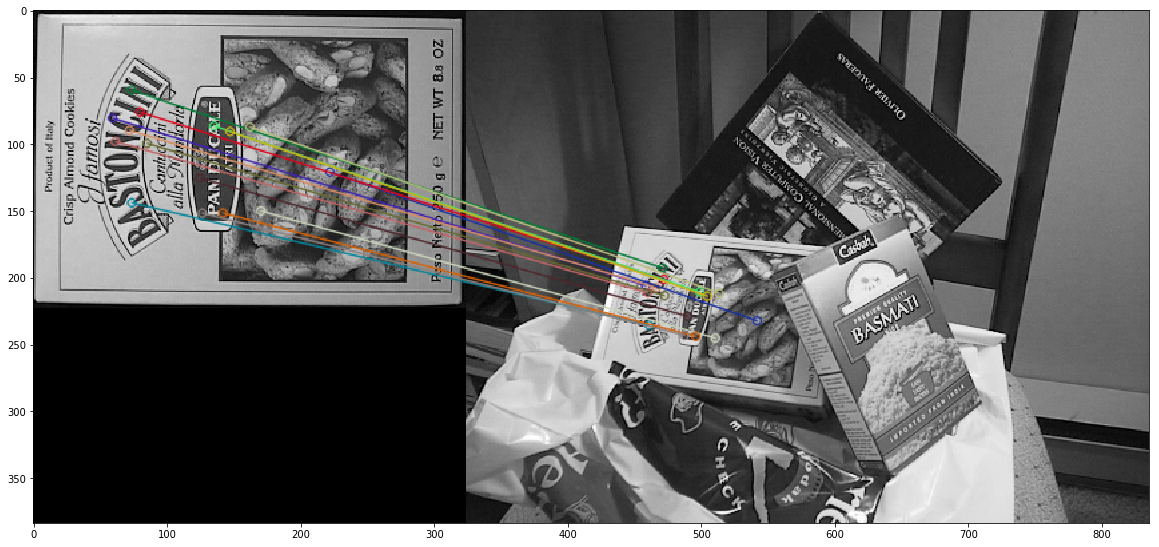

In [37]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Figs/box.png')          # queryImage
img2 = cv2.imread('Figs/box_in_scene.png') # trainImage

# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()                                

# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher()

# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.knnMatch(des1, des2, k=2)

# データを間引きする
ratio = 0.75
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])

# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

# 画像表示

plt.figure(figsize=(20,14))
plt.imshow(img3)
plt.show()


* 出典: https://qiita.com/mix_dvd/items/b2b50ced80be1dcdbf2e#_reference-d7b6b85e317aefc9ae75

In [86]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 画像読込
img1 = cv2.imread("Figs/Matched_2.jpg")
img2 = cv2.imread("Figs/Matched_0.jpg") # template

# A-KAZE検出器の生成
detector = cv2.AKAZE_create()

# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)

# Brute-Force Matcherの生成
bf = cv2.BFMatcher()

# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.knnMatch(des1, des2, k=2)

# データを間引く
ratio = 0.3
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])



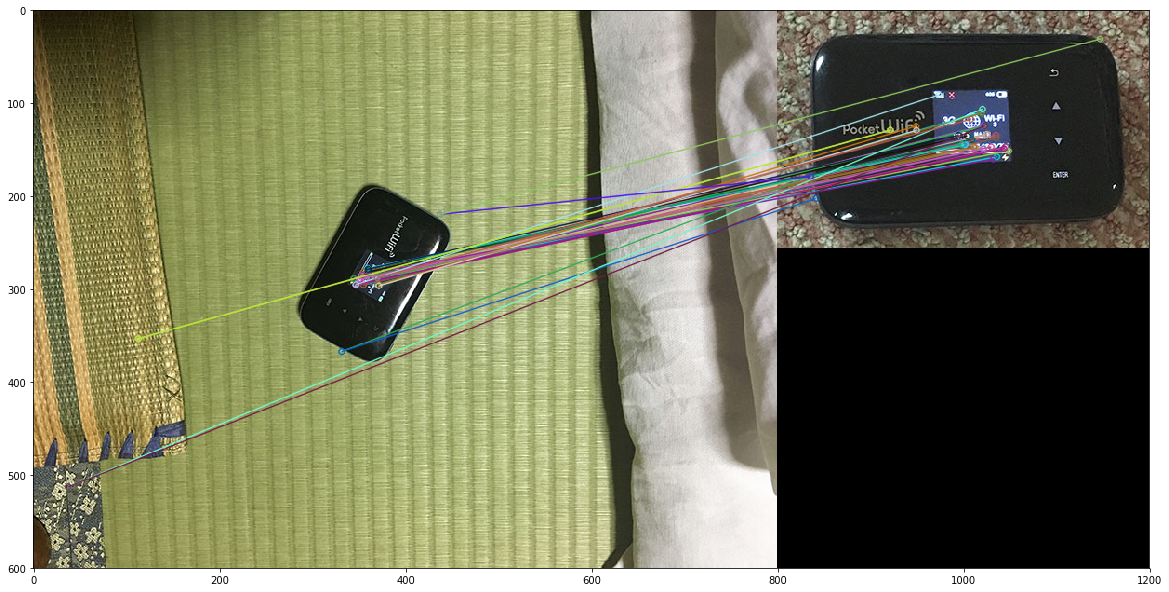

In [87]:
# 特徴量をマッチング状況に応じてソート
good = sorted(matches, key = lambda x : x[1].distance)

# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:20], None, flags=2)

# 画像表示

img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,14))
plt.imshow(img3)
plt.show()

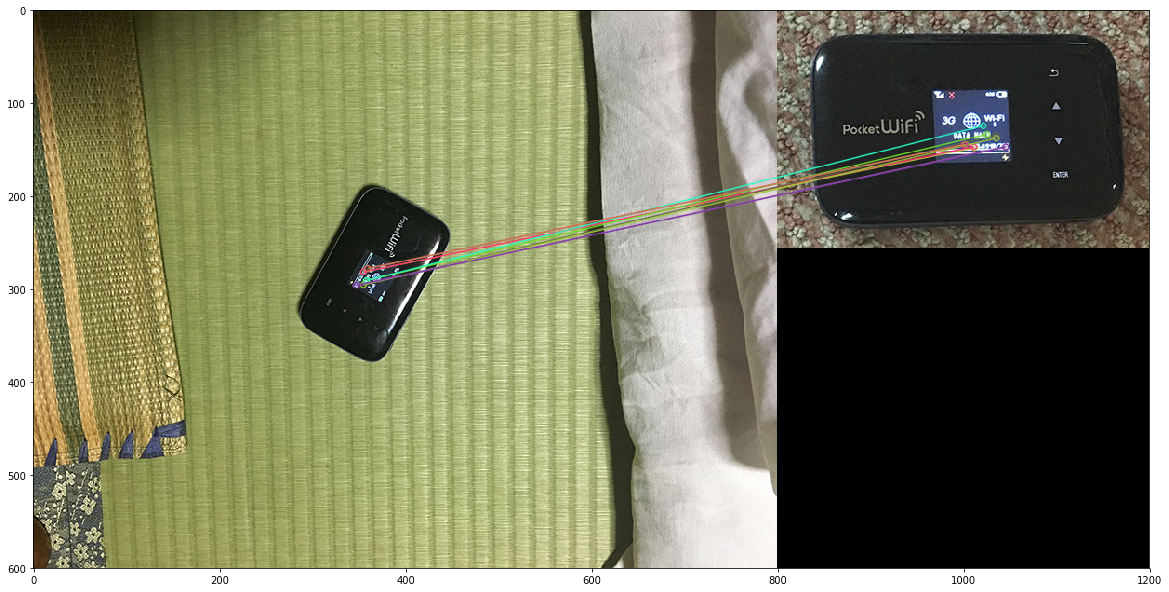

In [88]:
# 特徴量をマッチング状況に応じてソート
good = sorted(matches, key = lambda x : x[1].distance)

# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:5], None, flags=2)

img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

# 画像表示

plt.figure(figsize=(20,14))
plt.imshow(img3)
plt.show()

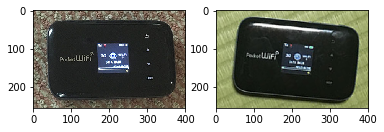

In [89]:
# 特徴量データを取得
import math

q_kp = []
t_kp = []

for p in good[:2]:
    for px in p:
        q_kp.append(kp1[px.queryIdx])
        t_kp.append(kp2[px.trainIdx])

# 加工対象の画像から特徴点間の角度と距離を計算 --- 修正あり
q_x1, q_y1 = q_kp[0].pt
q_x2, q_y2 = q_kp[-1].pt

q_deg = math.atan2(q_y2 - q_y1, q_x2 - q_x1) * 180 / math.pi
q_len = math.sqrt((q_x2 - q_x1) ** 2 + (q_y2 - q_y1) ** 2)

# テンプレート画像から特徴点間の角度と距離を計算 --- 修正あり
t_x1, t_y1 = t_kp[0].pt
t_x2, t_y2 = t_kp[-1].pt

t_deg = math.atan2(t_y2 - t_y1, t_x2 - t_x1) * 180 / math.pi
t_len = math.sqrt((t_x2 - t_x1) ** 2 + (t_y2 - t_y1) ** 2)

# 切出し位置の計算
x1 = q_x1 - t_x1 * (q_len / t_len)
x2 = x1 + img2.shape[1] * (q_len / t_len)

y1 = q_y1 - t_y1 * (q_len / t_len)
y2 = y1 + img2.shape[0] * (q_len / t_len)

# 整数化 --- 修正
x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)

# 画像サイズ
x, y, c = img1.shape
size = (x, y)

# 回転の中心位置
center = (q_x1, q_y1)

# 回転角度
angle = q_deg - t_deg

# サイズ比率
scale = 1.0

# 回転変換行列の算出
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# アフィン変換
img_rot = cv2.warpAffine(img1, rotation_matrix, size, flags=cv2.INTER_CUBIC)

# 画像の切出し
img_rot = img_rot[y1:y2, x1:x2]

# 縮尺調整
x, y, c = img2.shape
img_rot = cv2.resize(img_rot, (y, x))

img_rot = cv2.cvtColor(img_rot,cv2.COLOR_BGR2RGB)

# 画像表示
plt.subplot(1,2,1)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.subplot(1,2,2)
plt.imshow(img_rot)
plt.show()

In [75]:
print(x1,y1,x2,y2)
print(int(x1),int(y1),int(x2),int(y2))
print(x,y,c)

240 201 456 339
240 201 456 339
256 400 3


In [76]:
print(q_x1,q_y1,q_x2,q_y2)
print(t_x1,t_y1,t_x2,t_y2)

354.79132080078125 281.7053527832031 354.7454528808594 295.585693359375
211.70681762695312 148.41038513183594 235.39535522460938 138.19203186035156


In [77]:
print(q_len,q_deg)
print(t_len,t_deg)

13.880416361788336 90.18933459494417
25.798479743900206 -23.333569037586724
